In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("zoo.csv")
df


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 1. Preprocessing the Data

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [11]:
# Drop the 'animal name' column
data_cleaned = df.drop(columns=["animal name"])

In [12]:
# Check for missing values (already none, but for robustness)
print("Missing values:\n", data_cleaned.isnull().sum())

Missing values:
 hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64


In [13]:
# Normalize features (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = data_cleaned.drop(columns=["type"])  # Features
y = data_cleaned["type"]  # Target variable

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 2. Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 80
Testing set size: 21


# 3. Implementing KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [18]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

# 4. Evaluate the Model

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5. Visualize Decision Boundaries

In [22]:
from sklearn.decomposition import PCA
import numpy as np

In [23]:
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# Train a KNN classifier on reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [25]:
# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

In [26]:
# Predict on the grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

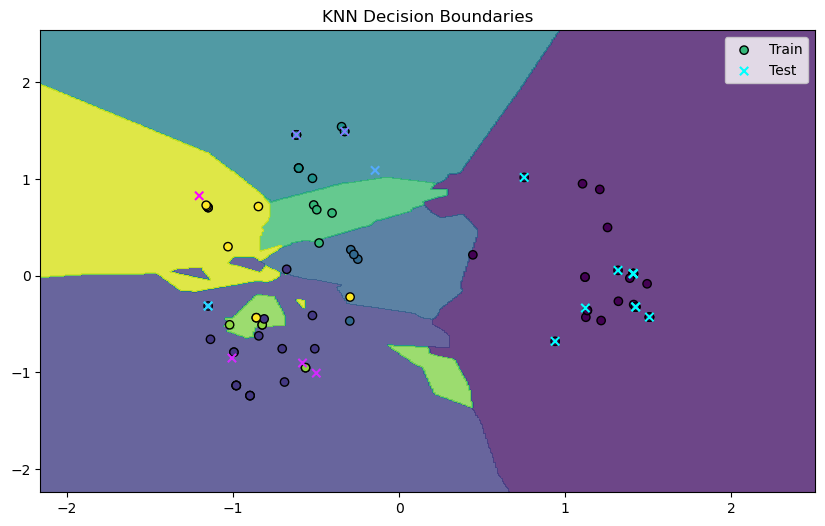

In [27]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="viridis")
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="k", cmap="viridis", label="Train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker="x", cmap="cool", label="Test")
plt.title("KNN Decision Boundaries")
plt.legend()
plt.show()

#### 1. What are the key hyperparameters in KNN?
K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm where the output is determined by the majority class (for classification) or the average value (for regression) of the 
𝑘
k-nearest neighbors. The performance of KNN is influenced by several key hyperparameters:

1. Number of Neighbors (k)
Description: The number of nearest neighbors to consider when making a prediction.
Effect on Performance:
Small values of k (e.g., k=1) can lead to high variance and overfitting because the model may be too sensitive to noise in the data.
Large values of k lead to smoother decision boundaries and can help reduce overfitting, but if 𝑘 is too large, it might underfit the data, especially if the data is highly complex.
2. Distance Metric (metric)
Description: The function used to calculate the distance between data points (i.e., how similarity between points is measured).
Effect on Performance: Different distance metrics can lead to different classifications or predictions. Common distance metrics include Euclidean, Manhattan, and Minkowski (a generalization of both).
3. Weights (weights)
Description: Defines how much influence each neighbor has on the prediction.
'uniform': All neighbors have equal weight.
'distance': Neighbors that are closer to the query point have a higher influence on the prediction.
Effect on Performance:
'uniform' treats all neighbors equally, which is a simpler approach.
'distance' gives more importance to closer neighbors, which can improve performance in some cases, especially when the data points have varying densities.
4. Algorithm (algorithm)
Description: Specifies the algorithm used to compute nearest neighbors. There are several algorithms available:
'auto': The algorithm is selected based on the input data (uses the best one for the dataset).
'ball_tree': Uses a BallTree algorithm, efficient for high-dimensional data.
'kd_tree': Uses a k-d tree algorithm, also efficient for high-dimensional data.
'brute': A brute-force search, which calculates distances directly between all points (best for small datasets).
Effect on Performance: The choice of algorithm affects the efficiency of finding the nearest neighbors, especially for large datasets or high-dimensional data.
5. Leaf Size (leaf_size)
Description: This is a hyperparameter used by the tree-based algorithms (BallTree or KDTree). It controls the size of the leaf nodes in the tree. A larger leaf size may speed up the model but reduce accuracy, while a smaller leaf size might improve accuracy at the cost of computational efficiency.
Effect on Performance: Larger leaf sizes can make the nearest neighbor search faster but might result in lower accuracy due to less precision in finding the nearest neighbors.
6. P (Power Parameter for Minkowski Distance)
Description: When using Minkowski distance (a generalization of Euclidean and Manhattan distances), this parameter controls the order of the distance metric:
p = 1 corresponds to the Manhattan distance.
p = 2 corresponds to the Euclidean distance.
Other values of p represent different generalizations of the distance metric.
Effect on Performance: This hyperparameter allows the model to adjust the distance function depending on the data's characteristics and the problem domain.
7. Metric Parameters (metric_params)
Description: These are additional parameters passed to the distance metric. They are used in some distance metrics like Minkowski to modify how the distance is calculated.
Effect on Performance: Adjusting these parameters can affect the behavior of distance-based algorithms, especially in specialized scenarios (e.g., using custom distance metrics).



#### 2. What distance metrics can be used in KNN?
1. Euclidean Distance (L2 Norm)
2. Manhattan Distance (L1 Norm)
3. Minkowski Distance
4. Chebyshev Distance
5. Hamming Distance
6. Cosine Similarity
7. Mahalanobis Distance